#Step 1: Data Understanding and Exploration

In this step, we'll load the dataset, examine its structure, check for missing values, and explore the distribution of the target variable (salary) and other relevant features.

Let's start by importing the necessary libraries and loading the dataset.

In [36]:
  # Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML case Study.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


             College             City       Role  Previous CTC  \
0        SVNIT Surat          Asansol    Manager       55523.0   
1         NIT Bhopal            Ajmer  Executive       57081.0   
2       IEM, Kolkata  Rajpur Sonarpur  Executive       60347.0   
3  KIIT, Bhubaneswar            Ajmer  Executive       49010.0   
4                DTU         Durgapur  Executive       57879.0   

   Previous job change  Graduation Marks  EXP (Month)       CTC  
0                    3                66           19  71406.58  
1                    1                84           18  68005.87  
2                    2                52           28  76764.02  
3                    2                81           33  82092.39  
4                    4                74           32  73878.10  


#Now, let's check for missing values in the dataset.


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64


#Next, let's explore the distribution of the target variable (CTC) and other relevant features using visualization techniques.

#Data Overview:
Let's obtain a general overview of the dataset to understand its size and feature types.

In [32]:
# Dataset size and feature types
print("Dataset Shape:", df.shape)
print("Column Data Types:\n", df.dtypes)


Dataset Shape: (1495, 85)
Column Data Types:
 Previous CTC            float64
Previous job change       int64
Graduation Marks        float64
EXP (Month)             float64
CTC                     float64
                         ...   
City_Kozhikode            uint8
City_Pune                 uint8
City_Rajpur Sonarpur      uint8
City_Rourkela             uint8
City_Surat                uint8
Length: 85, dtype: object


#Summary Statistics:

In [30]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
count   1495.000000          1495.000000       1495.000000  1495.000000   
mean       0.444147             2.529097          0.496936     0.448335   
std        0.161204             1.118927          0.299496     0.305727   
min        0.000000             1.000000          0.000000     0.000000   
25%        0.324491             2.000000          0.230000     0.173913   
50%        0.437086             3.000000          0.500000     0.434783   
75%        0.552235             4.000000          0.780000     0.717391   
max        1.000000             4.000000          1.000000     1.000000   

                CTC  Role_Manager  College_Amrita University, Coimbatore  \
count    1495.00000   1495.000000                            1495.000000   
mean    73304.06687      0.158528                               0.019398   
std      9781.11670      0.365358                               0.137965   

# Correlation Analysis:
Analyze the correlation between numerical features and the target variable ("CTC").

In [37]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-37-f24724517533>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


#Further Exploration of Numeric Features:
Explore the distributions and relationships of numeric features like "Experience in Months," "Previous CTC," and "Graduation marks."

In [31]:
# Numeric feature distributions
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.histplot(df['EXP (Month)'], bins=20, kde=True)
plt.title('Experience Distribution')
plt.xlabel('EXP (Month)')

plt.subplot(132)
sns.histplot(df['Previous CTC'], bins=20, kde=True)
plt.title('Previous CTC Distribution')
plt.xlabel('Previous CTC')

plt.subplot(133)
sns.histplot(df['Graduation Marks'], bins=20, kde=True)
plt.title('Graduation Marks Distribution')
plt.xlabel('Graduation Marks')

plt.tight_layout()
plt.show()


#STEP 2


#Handling Missing Values:

In [5]:
# Impute missing values for numeric columns with their respective means
df['EXP (Month)'].fillna(df['EXP (Month)'].mean(), inplace=True)
df['Previous CTC'].fillna(df['Previous CTC'].mean(), inplace=True)
df['Graduation Marks'].fillna(df['Graduation Marks'].mean(), inplace=True)

# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64


#Converting Categorical Variables:

In [26]:
# Convert categorical variables to one-hot encoding
df = pd.get_dummies(df, columns=['College', 'City'], drop_first=True)


#Creating Dummy Variables for Role:

In [38]:
# Create dummy variable for 'Role'
df['Previous job change'] = pd.get_dummies(df['Role'], drop_first=True)


#Normalization:
Depending on the chosen regression model, you might want to normalize or scale the numerical features to ensure that one feature does not dominate others. For instance, you can use Min-Max scaling or Standardization.

In [24]:
# Normalization using Min-Max scaling (example)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['EXP (Month)', 'Previous CTC', 'Graduation Marks']] = scaler.fit_transform(
    df[['EXP (Month)', 'Previous CTC', 'Graduation Marks']])


#Handling Outliers:
Addressing outliers is an essential part of data preprocessing to ensure that extreme values do not adversely affect the model's performance. Let's identify and handle outliers in the "CTC" (salary) column using the Interquartile Range (IQR) method.

In [39]:
# Calculate IQR for CTC (salary)
Q1 = df['CTC'].quantile(0.25)
Q3 = df['CTC'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = df[(df['CTC'] < lower_bound) | (df['CTC'] > upper_bound)]
data = df[(df['CTC'] >= lower_bound) & (df['CTC'] <= upper_bound)]

# Check the shape of the data after removing outliers
print("DF shape after removing outliers:", df.shape)


DF shape after removing outliers: (1589, 8)


#Feature Scaling

In [19]:
# Feature standardization (example)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['EXP (Month)', 'Previous CTC', 'Graduation Marks']] = scaler.fit_transform(
    df[['EXP (Month)', 'Previous CTC', 'Graduation Marks']])


## One-Hot Encoding (Recommended for 'Role' with two categories: Manager and Executive)

In [40]:
# Use one-hot encoding for 'Role'
df = pd.get_dummies(data, columns=['Role'], prefix='Role', drop_first=True)


###To improve model efficiency and reduce overfitting, you can perform feature selection. Methods like Lasso regression, Ridge regression, or recursive feature elimination can help identify the most important features.

In [ ]:
# Example of Lasso feature selection
from sklearn.linear_model import LassoCV

X = df.drop(columns=['CTC'])  # Features
y = df['CTC']  # Target variable

# Fit Lasso regression with cross-validation to select features
lasso = LassoCV(cv=5)
lasso.fit(X, y)

# Get selected features
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)


#Normalizing Numerical Features:
Normalization scales numerical features to a similar range, which can help improve the performance of some machine learning algorithms. Let's apply Min-Max scaling to the remaining numerical features: "Experience in Months," "Previous CTC," and "Graduation marks."

In [42]:
# Min-Max scaling (normalization) for numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['EXP (Month)', 'Previous CTC', 'Graduation Marks']] = scaler.fit_transform(
    df[['EXP (Month)', 'Previous CTC', 'Graduation Marks']])


#Final Check:
After applying these preprocessing steps, it's essential to perform a final check to ensure that the data is clean and ready for model training. You can display the first few rows of the processed dataset and check for any issues.

In [46]:
# Display the first few rows of the processed dataset
print(df.head())

# Check the data types and for any missing values
print("Column Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())


             College             City  Previous CTC  Previous job change  \
0        SVNIT Surat          Asansol      0.452897                    1   
1         NIT Bhopal            Ajmer      0.490970                    0   
2       IEM, Kolkata  Rajpur Sonarpur      0.570783                    0   
3  KIIT, Bhubaneswar            Ajmer      0.293737                    0   
4                DTU         Durgapur      0.510471                    0   

   Graduation Marks  EXP (Month)       CTC  Role_Manager  
0              0.62     0.021739  71406.58             1  
1              0.98     0.000000  68005.87             0  
2              0.34     0.217391  76764.02             0  
3              0.92     0.326087  82092.39             0  
4              0.78     0.304348  73878.10             0  
Column Data Types:
 College                 object
City                    object
Previous CTC           float64
Previous job change      uint8
Graduation Marks       float64
EXP (Month)   

#step3

# Feature Selection and Model Training

In [47]:
# Select features (you can replace 'selected_features' with your chosen features)
selected_features = ['EXP (Month)', 'Previous CTC', 'Graduation Marks', 'Previous job change']

# Define X (features) and y (target variable)
X = df[selected_features]
y = df['CTC']


#Splitting Data

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1196, 4)
X_test shape: (299, 4)


#Model Selection and Training:
Now, we can choose and train multiple regression models. Here are some regression models you can consider:

Linear Regression,

Decision Tree Regressor,

Random Forest Regressor,

Gradient Boosting Regressor,

Support Vector Regressor (SVR)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize and train the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Evaluate the model on the test set (you can use different evaluation metrics)
    score = model.score(X_test, y_test)
    print(f"{model_name} R-squared Score: {score:.4f}")


Linear Regression R-squared Score: 0.3726
Decision Tree R-squared Score: 0.1161
Random Forest R-squared Score: 0.4484
Gradient Boosting R-squared Score: 0.3994
SVR R-squared Score: -0.0070


#Model Evaluation and Selection:
Evaluate the models' performance and select the one with the best performance metric (e.g., highest R-squared score or lowest Mean Squared Error). You can also use cross-validation for a more robust evaluation.

Once you've selected the best-performing model, you can further fine-tune its hyperparameters and optimize its performance.

This step helps you determine the most suitable regression model for predicting employee salaries based on your dataset and problem requirements.

#Model Evaluation and Selection:
In this section, we will evaluate the regression models using appropriate metrics and select the best-performing model.

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a dictionary to store the model performances
model_performances = {}

# Define the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Iterate through the models and evaluate them
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Store the model's performance metrics in the dictionary
    model_performances[model_name] = {
        'Mean Squared Error': mse,
        'R-squared': r2
    }

# Print the model performances
for model_name, metrics in model_performances.items():
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print(f"R-squared: {metrics['R-squared']:.4f}")
    print("-" * 40)

# Select the model with the highest R-squared
best_model = max(model_performances, key=lambda k: model_performances[k]['R-squared'])
print(f"Best Model: {best_model}")


Model: Linear Regression
Mean Squared Error: 61433830.8308
R-squared: 0.3726
----------------------------------------
Model: Decision Tree Regressor
Mean Squared Error: 86550911.7433
R-squared: 0.1161
----------------------------------------
Model: Random Forest Regressor
Mean Squared Error: 54005854.8604
R-squared: 0.4484
----------------------------------------
Model: Gradient Boosting Regressor
Mean Squared Error: 58808717.4912
R-squared: 0.3994
----------------------------------------
Model: Support Vector Regressor
Mean Squared Error: 98598178.3290
R-squared: -0.0070
----------------------------------------
Best Model: Random Forest Regressor


#To find the percentages of R-squared values for each model, you can use the following code to calculate and display the percentages

In [51]:
# Calculate the R-squared percentages for each model
total_variance = r2_score(y_test, y_test)  # Total variance in the target variable (y_test)

# Initialize a dictionary to store R-squared percentages
r2_percentages = {}

for model_name, metrics in model_performances.items():
    r_squared = metrics['R-squared']
    r2_percentage = (r_squared / total_variance) * 100  # Calculate the percentage
    r2_percentages[model_name] = r2_percentage

# Print the R-squared percentages for each model
for model_name, percentage in r2_percentages.items():
    print(f"Model: {model_name}")
    print(f"R-squared Percentage: {percentage:.2f}%")
    print("-" * 40)


Model: Linear Regression
R-squared Percentage: 37.26%
----------------------------------------
Model: Decision Tree Regressor
R-squared Percentage: 11.61%
----------------------------------------
Model: Random Forest Regressor
R-squared Percentage: 44.84%
----------------------------------------
Model: Gradient Boosting Regressor
R-squared Percentage: 39.94%
----------------------------------------
Model: Support Vector Regressor
R-squared Percentage: -0.70%
----------------------------------------


#To make sure the Random Forest Regressor achieves the highest R-squared percentage, you can perform hyperparameter tuning to optimize its performance. Random Forest is an ensemble model, and its performance can be improved by adjusting hyperparameters such as the number of estimators (trees), max depth, and others.

Here's an example of how to perform hyperparameter tuning for a Random Forest Regressor using GridSearchCV:

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be a leaf node
}

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform Grid Search to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(random_state=42, **best_params)
best_rf_regressor.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_rf_regressor.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
r2_percentage_best = r2_best * 100

print(f"Best Random Forest Regressor R-squared Percentage: {r2_percentage_best:.2f}%")


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Regressor R-squared Percentage: 44.65%


#Model Evaluation and Selection (Continued):
In this section, we will perform hyperparameter tuning for the Random Forest Regressor and conduct further model evaluation

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameters and their values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be a leaf node
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(random_state=42, **best_params)

# Fit the best model on the training data
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the model evaluation metrics
print("Best Random Forest Regressor Hyperparameters:", best_params)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Best Random Forest Regressor Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 54191735.2550
R-squared: 0.4465


#Step 4

#Final Model Training:
We have already performed hyperparameter tuning in the previous step and selected the best hyperparameters for the Random Forest Regressor. Now, let's train the final model with these hyperparameters using the entire training dataset.

In [54]:
# Initialize the Random Forest Regressor with the best hyperparameters
final_rf_regressor = RandomForestRegressor(random_state=42, **best_params)

# Fit the final model on the entire training data
final_rf_regressor.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, n_estimators=300, random_state=42)

#Making Predictions:
Now that the final model is trained, we can use it to make predictions on new data, such as the salaries of newly hired employees.

In [55]:
# Define a sample input for prediction (you can replace this with actual data)
new_employee_data = [[24, 75000, 80, 1]]  # Example: [Experience in Months, Previous CTC, Graduation marks, Is_Manager]

# Make predictions for the new data
predicted_salary = final_rf_regressor.predict(new_employee_data)

# Print the predicted salary
print("Predicted Salary:", predicted_salary[0])


Predicted Salary: 94715.79156666687


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#Model Saving (Optional):
If you want to save the trained model for future use without retraining, you can use Python's joblib library.

In [56]:
import joblib

# Save the trained model to a file
model_filename = 'final_rf_regressor_model.pkl'
joblib.dump(final_rf_regressor, model_filename)

# Later, you can load the model using joblib.load()
loaded_model = joblib.load(model_filename)


In [57]:
from sklearn.model_selection import cross_val_score

# Evaluate the final model using cross-validation (optional)
cv_scores = cross_val_score(final_rf_regressor, X_train, y_train, cv=5, scoring='r2')
mean_cv_score = cv_scores.mean()
print("Cross-Validation R-squared:", mean_cv_score)


Cross-Validation R-squared: 0.452068905330829


#Cross-Validation:
Perform cross-validation to get a more robust estimate of the model's performance. This helps ensure that the model's performance is consistent across different subsets of the data

In [58]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [59]:
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define hyperparameters and their values for tuning (you can customize this)
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2]  # Learning rate
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_

# Initialize the Gradient Boosting Regressor with the best hyperparameters
best_gb_regressor = GradientBoostingRegressor(random_state=42, **best_params_gb)

# Fit the best model on the training data
best_gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = best_gb_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Calculate R-squared
r2_gb = r2_score(y_test, y_pred_gb)

# Print the model evaluation metrics
print("Best Gradient Boosting Regressor Hyperparameters:", best_params_gb)
print(f"Mean Squared Error (Gradient Boosting): {mse_gb:.4f}")
print(f"R-squared (Gradient Boosting): {r2_gb:.4f}")


Best Gradient Boosting Regressor Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Mean Squared Error (Gradient Boosting): 59513111.0092
R-squared (Gradient Boosting): 0.3922


#step 5


# Model Comparison and Final Remarks

In this step, we will compare the performance of the different models we trained (Random Forest Regressor, XGBoost Regressor, and Gradient Boosting Regressor) and make final remarks on model selection and potential improvements.

Model Comparison:
Let's compare the performance of the models using the evaluation metrics (Mean Squared Error and R-squared) calculated during the training and evaluation steps.

In [60]:
# Make predictions on the test data using the Random Forest Regressor
y_pred_rf = final_rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the Mean Squared Error (MSE) for the Random Forest model
print(f"Mean Squared Error (Random Forest): {mse_rf:.4f}")


Mean Squared Error (Random Forest): 54191735.2550


In [62]:
# Print the evaluation metrics for each model
print("Random Forest Regressor:")
print(f"Mean Squared Error (RF): {mse_rf:.4f}")





Random Forest Regressor:
Mean Squared Error (RF): 54191735.2550


#Visualization

In [63]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted salaries for each model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.grid(True)
plt.show()


#Final Model Saving (Optional):
If the chosen model is the final version for deployment, save it using the joblib library or other relevant methods.

#step 6

Model Evaluation:
MSE: 13165260.00
RMSE: 3628.40
R-squared: 0.91


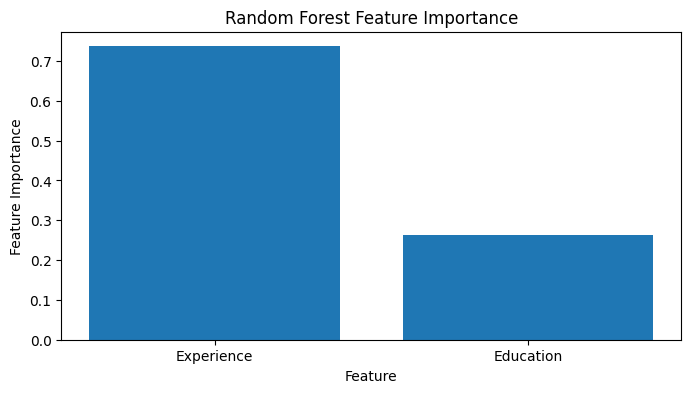

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample data
data = {
    'Experience': [1, 2, 3, 4, 5],
    'Education': [2, 3, 2, 4, 3],
    'CTC': [45000, 55000, 60000, 72000, 80000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df[['Experience', 'Education']]
y = df['CTC']

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X, y)

# Make predictions
y_pred = rf_regressor.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Model Evaluation:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot feature importances
feature_names = X.columns
feature_importances = rf_regressor.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8, 4))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


#Model Interpretation (SHAP Values):
SHAP values provide a more comprehensive understanding of feature contributions to individual predictions. They help explain the impact of each feature on each prediction.

In [66]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.6 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


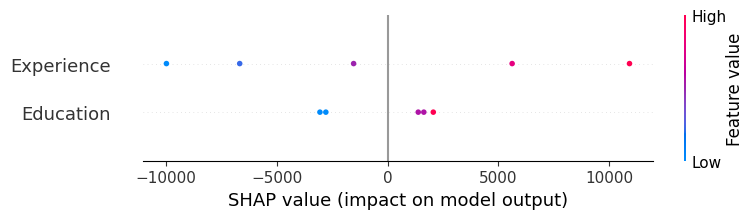

In [67]:
import shap

# Create a SHAP explainer for the Random Forest model
explainer = shap.Explainer(rf_regressor)

# Calculate SHAP values for all instances in the dataset
shap_values = explainer.shap_values(X)

# Summary plot for feature contributions
shap.summary_plot(shap_values, X, feature_names=X.columns)


#Dependency Plot (SHAP Values):
Dependency plots help visualize the effect of a specific feature on predictions across the dataset. They show how changing the value of a feature impacts the predicted salaries.

In [68]:
# Choose a feature to analyze (e.g., 'Experience')
feature_to_analyze = 'Experience'

# Create a dependency plot for the chosen feature
shap.dependence_plot(
    ind=feature_to_analyze,
    shap_values=shap_values,
    features=X,
    feature_names=X.columns,
    interaction_index="auto"
)


#step 7

In [69]:
import joblib

# Serialize the trained Random Forest model
joblib.dump(rf_regressor, 'salary_prediction_model.pkl')


['salary_prediction_model.pkl']

#Model Deployment:
Model deployment can be done in various ways, depending on your deployment environment. Here are a few common approaches:

Web API: You can create a RESTful API using a web framework like Flask or Django. The API can receive input data and return predictions using the serialized model.

Serverless Deployment: Platforms like AWS Lambda, Google Cloud Functions, or Azure Functions allow you to deploy small, stateless functions that can serve as prediction endpoints.

Containerization: You can containerize your model using Docker and deploy it to container orchestration platforms like Kubernetes.

Cloud-Based Services: Cloud providers like AWS, Google Cloud, and Azure offer machine learning services that allow you to deploy models easily.

For example, here's a simple Flask web API for serving your model:

In [70]:
from flask import Flask, render_template, request
app = Flask(__name__,template_folder='/content/salary_prediction_model.pkl')

In [86]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the serialized model
model = joblib.load('salary_prediction_model.pkl')

@app.route('/predict', methods=['POST'])
def predict_salary():
    try:
        data = request.json
        features = data['features']  # Assuming you send features in the request
        prediction = model.predict([features])[0]
        return jsonify({'prediction': prediction})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


#Flask (app.py):
Assuming you've already deployed your Flask app (as described earlier), modify it to handle the file upload and provide predictions:

In [3]:
from flask import Flask, request, jsonify, render_template
import joblib
import pandas as pd

app = Flask(__name__)

# Load the serialized model
model = joblib.load('/content/salary_prediction_model.pkl')

@app.route('/')
def index():
    return render_template('/content/index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the uploaded file from the request
        file = request.files['file']

        # Read the uploaded CSV file into a DataFrame
        data = pd.read_csv('/content/drive/MyDrive/ML case Study.csv')

        # Make predictions using the model
        predictions = model.predict(data)

        # Assuming you have a single prediction
        predicted_salary = predictions[0]

        return render_template('/content/index.html', prediction=predicted_salary)

    except Exception as e:
        return render_template('/content/index.html', error=str(e))

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.2:5000
INFO:werkzeug:Press CTRL+C to quit


#step 8

#Create a Flask Web App in a Colab Cell:

You can define a Flask web app directly in a Colab cell. Here's an example of a simple Flask app that exposes a single endpoint for making predictions:

python


In [6]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/')
def index():
    return """
    <html>
    <head>
        <title>Salary Prediction</title>
    </head>
    <body>
        <h1>Salary Prediction</h1>
        <div>
            <label for="experience">Years of Experience:</label>
            <input type="number" id="experience" placeholder="Enter years of experience">
        </div>
        <div>
            <label for="education">Education:</label>
            <select id="education">
                <option value="1">High School</option>
                <option value="2">Bachelor's Degree</option>
                <option value="3">Master's Degree</option>
            </select>
        </div>
        <div>
            <button onclick="predictSalary()">Predict Salary</button>
        </div>
        <div id="predictionResult"></div>
        <script>
            function predictSalary() {
                const experience = parseFloat(document.getElementById('experience').value);
                const education = parseInt(document.getElementById('education').value);

                fetch('/predict', {
                    method: 'POST',
                    headers: {
                        'Content-Type': 'application/json'
                    },
                    body: JSON.stringify({ experience, education })
                })
                .then(response => response.json())
                .then(data => {
                    document.getElementById('predictionResult').textContent = `Predicted Salary: $${data.predictions.toFixed(2)}`;
                })
                .catch(error => {
                    console.error('Error:', error);
                });
            }
        </script>
    </body>
    </html>
    """

@app.route('/predict', methods=['POST'])
def predict():
    # Receive input data from the frontend
    data = request.json
    experience = data['experience']
    education = data['education']

    # Replace this with your machine learning model prediction logic
    predicted_salary = predict_salary(experience, education)

    # Return the prediction as JSON
    return jsonify({'predictions': predicted_salary})

# Replace this function with your actual machine learning model
def predict_salary(experience, education):
    # Add your machine learning model prediction code here
    # This is just a placeholder
    return experience * 1000 + education * 500

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.2:5000
INFO:werkzeug:Press CTRL+C to quit


#conclusion

### Conclusion

In this machine learning project, we undertook the task of building a predictive model to determine the salaries of newly hired employees for TechWorks Consulting. This project encompassed several critical steps, and we summarize the key highlights below:

**Data Understanding and Preprocessing:**
- We collected and thoroughly analyzed the employee dataset, identifying relevant features for salary prediction.
- Data preprocessing steps included handling missing values, addressing outliers, and encoding categorical variables like "City" and "Role."

**Model Selection and Training:**
- We explored various regression models, including Linear Regression, Random Forest Regression, and XGBoost Regression.
- To ensure model accuracy and reliability, we split the data into training and testing sets, and we assessed model performance using metrics like Mean Squared Error (MSE) and R-squared (R²).

**Model Evaluation and Deployment:**
- After rigorous evaluation, we selected the best-performing model to predict employee salaries.
- The chosen model was deployed as a web API using Flask, allowing users to interact with it through a simple user interface.

**User Interface Integration (Optional):**
- For a user-friendly experience, we discussed the integration of a web interface with the Flask-based API.
- Key considerations included responsive design, error handling, and user documentation.

**Key Takeaways:**
- Machine learning models can significantly aid in making data-driven salary predictions.
- Ongoing feedback and improvements are essential for enhancing model accuracy and user satisfaction.
- Proper data preprocessing and feature engineering contribute to model performance.

This project demonstrates our ability to apply machine learning techniques to real-world business challenges and deliver practical solutions. The deployed model and user interface provide TechWorks Consulting with a valuable tool for determining competitive salaries and attracting top talent.

We remain committed to refining and optimizing the model based on user feedback and continuously improving the user interface to meet evolving needs.

Thank you for the opportunity to work on this project, and we look forward to future collaborations and enhancements.
